# The Central Limit Theorem - A first approach

## 📚  1) Introduction to the CLT

🚀  **Two convergence theorems revolutionized the disciplines of probability and statistics:**
- **`LLN`: the Law of Large Numbers**
- **`CLT`: the Central Limit Theorem**

🧑🏻‍🏫  What is the CLT ? According to [Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)

> The CLT states that when independent random variables are summed up, their normalized sum tends towards a **`Gaussian distribution`**  even if the original variables themselves were not normally distributed.

> The Gaussian distribution is also known as a **`Normal Distribution`** or a **`bell curve`**.


<details>
    <summary>Why is the CLT a key concept of probability theory?</summary>
    
👉   Because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.
    
🤔   Not clear for you yet ? No problem, we will elaborate on this during the `Decision Science - Inferential Statistics` chapter
    
As we love to say at ***`Le Wagon`***, ***Trust the process!***
    
</details>

🎯  Let's illustrate how to use the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) in a dataset:

* Given a population, let's consider a feature (example: size, weight, salary, etc...) for each individual.


🚀  The important takeaway of these two theorems is that **whatever the shape of the distribution** of a given feature over the population **is**, **the distribution of the (sampled) mean<u>S</u> tends to be Gaussian**:
* `the mean of the means` = $ \mu$ (Law of Large Numbers)
* `the standard deviation of the means` = $ \frac{\sigma}{\sqrt{n}} $  (Central Limit Theorem)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)

💡  We can wrap it up the following way:

$$ \large \bar{X} \approx_{n \rightarrow \infty} \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}}) $$

👩🏻‍🔬  Let's verify this experimentally!

---

## 🔢  2) The Dataset

👉 In this challenge, we will use the `tips` dataset from the `seaborn` library to illustrate the Central Limit Theorem.

In [1]:
# --- Data Manipulation  ---
#import numpy and pandas 
#YOUR CODE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd 
tips = sns.load_dataset("tips")
# --- Data Visualization ---
#import Seaborn and the module pyplot of matplotlib
#YOUR CODE 

# --- Maths ---
#import the library maths
#YOUR CODE 
def output():
    print("\n\n\n")

Info tips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None




Describe dataset

     total_bill   tip     sex smoker   day    time  size
140       17.47  3.50  Female     No  Thur   Lunch     2
121       13.42  1.68  Female     No  Thur   Lunch     2
196       10.34  2.00    Male    Yes  Thur   Lunch     2
168       10.59  1.61  Female    Yes   Sat  Dinner     2
206       26.59  3.41    Male    Yes   Sat  Dinner     3
            count       mean       std   min      25%     50%      75%    m

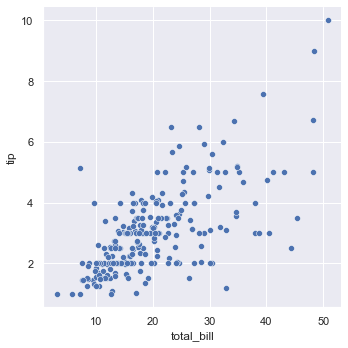

In [2]:
# Download the data 'tips'of searborn and display tips
print("Info tips",end="\n\n")
print(tips.info())
output()
print("Describe dataset",end="\n\n")
print(tips.sample(5))
print(tips.describe().T)
output()
print("plot relation between tips and bills")
sns.set(style="darkgrid")
sns.relplot(x = "total_bill", y = "tip", data = tips);
output()

plot relation between tips and bills by  sex


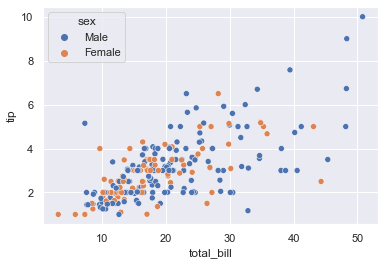

In [3]:
print("plot relation between tips and bills by  sex")
sns.scatterplot(x = "total_bill", y = "tip", hue= "sex", data = tips);

plot relation between tips and bills by smoker index


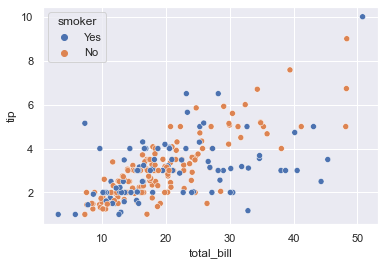

In [4]:
print("plot relation between tips and bills by smoker index")
sns.scatterplot(x = "total_bill", y = "tip", hue= "smoker", data = tips);

plot relation between tips and bills by smoker index according to time


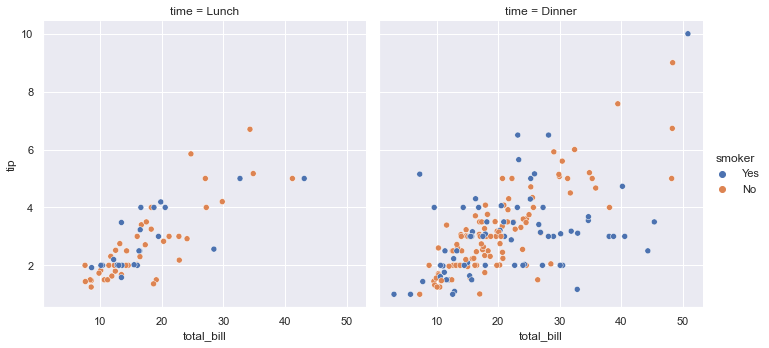

In [5]:
print("plot relation between tips and bills by smoker index according to time")
sns.relplot(x = "total_bill", y = "tip", hue = "smoker", col = "time", data = tips);


plot relation between total_bill and day


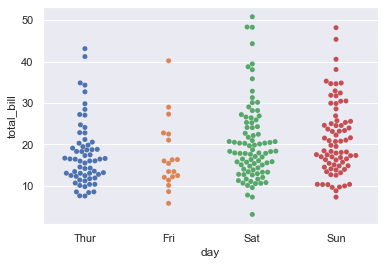

In [6]:
print("plot relation between total_bill and day")
sns.swarmplot(x = "day", y = "total_bill", data = tips);

plot bill according to day and time


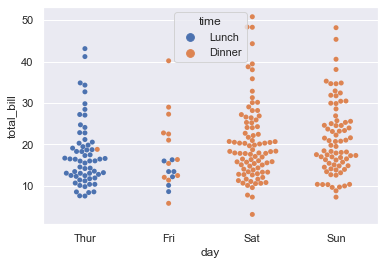

In [7]:
print("plot bill according to day and time")
sns.swarmplot(x = "day", y = "total_bill", hue = "time", data = tips);


plot boxplot of total_bill by days according to sex


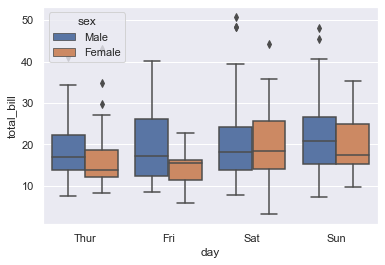

In [8]:
print("plot boxplot of total_bill by days according to sex")
sns.boxplot(x = "day", y = "total_bill", hue = "sex", data = tips);


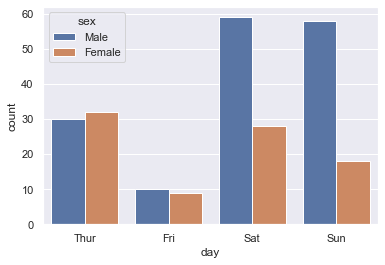

In [9]:
sns.countplot(x = "day", hue ="sex", data = tips);

### 🧐  2.1) Exploratory Data Analysis (EDA)

❓ How many rows are available in the dataset ❓

In [10]:
#YOUR CODE
print(tips.columns)

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


❓ Plot the distribution of the `tip` column 📊 (with 20 bins) ❓

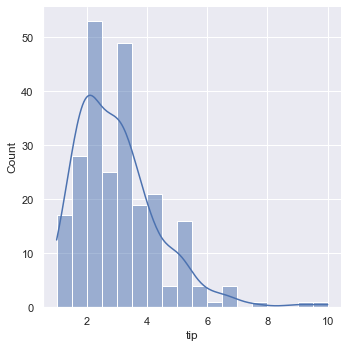

In [11]:
#YOUR CODE 
sns.displot(tips, x='tip',kde=True)



❓ Question 1 ❓

What are :
* the ***average tip***
* the ***standard deviation tip*** 
* the  [***skewness of the tips***](https://whatis.techtarget.com/definition/skewness)

of the tips? 

Store them into three variables called respectively `tips_mu`, `tips_sigma` and `tips_skew`

In [12]:
#YOUR CODE 
mean_tip=tips['tip'].mean()
print("average tip is ",mean_tip)
output()
std_tip=tips['tip'].std()
print("standard deviation of tip is ",std_tip)
output()
skewness=tips['tip'].skew()
print("skewness of tip is",skewness)

average tip is  2.99827868852459




standard deviation of tip is  1.3836381890011822




skewness of tip is 1.4654510370979401


❓ Question 2 ❓

What is the skewness of the tips: left, right, non-skewed? Store your answer in a string variable called `skewness`

In [13]:
#YOUR CODE
#skewness =  # complete with 'right' or 'left'
skewness='right' #because the value is positive 

In [14]:
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<details>
    <summary>Answer for the question related to the skewness:</summary>

* the "mode" seems to be around 2 dollars `(we can't really talk about a mode for a continuous variable but just looking at the histogram with 20 bins, we can give an estimation)
    
* the "mean" is at 2.99 dollars
    
* the median is at 2.90 dollars
    
So here we have $ mode < median < mean $ which correspond to a `right skewness` if you go back to the `Statistics and Probability` slides 😉
    
    
</details>

### 🎲 2.2) Sampling mean

❓ Pick randomly - and with replacement - 10 rows of the dataset, and compute the mean $\bar{X}$ of that sample ❓

👉 Run the cell a few times. Do you get the same result each time? Is this expected?

In [15]:
#YOUR CODE 
import random
tips_list=list(tips['tip'])
means_tips=[]
for i in range(30):
    new_mean=np.mean(random.sample(tips_list,10))
    means_tips.append(new_mean)
print("Our means is ",means_tips)
general_mean=np.mean(means_tips)
general_std=np.std(means_tips)

Our means is  [2.798, 3.375, 2.715, 3.119, 2.412, 3.099, 2.3890000000000002, 2.517, 3.322, 3.5179999999999993, 3.3880000000000003, 3.039, 2.9240000000000004, 3.46, 3.306, 3.3280000000000003, 3.503, 2.9400000000000004, 2.304, 2.993, 3.5740000000000003, 2.864, 3.05, 3.0100000000000002, 2.52, 3.5200000000000005, 2.46, 3.2290000000000005, 2.68, 2.6019999999999994]


---

## 🔥 3) Applying the CLT

### 3.1) <u>Graphically</u>

👉 Create a `means` list storing a list of means of $N$ samples of size $n$.

Start with $n = 5$ and $N = 10$

📊  In the same cell, **plot** the distribution of `means`. 

🧐 Let's play with the <u>*sample size n*</u> and the <u>*number of samples N</u>*:
* Keep $n$ constant, increase $N$ and observe: display the distributions. What do you conclude?

2.52

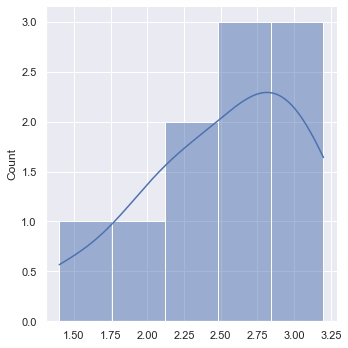

In [16]:
def means_generation(N,n):
    m=[]
    for i in range(N):
        temp=[]
        for j in range(n):
            number=random.randint(0,n)
            temp.append(number)
        m.append(np.mean(temp))
        temp=[]
    sns.displot(m,kde=True)
    return np.mean(m)
    
n = 5
N = 10
#YOUR CODE 
means_generation(N,n)

2.504

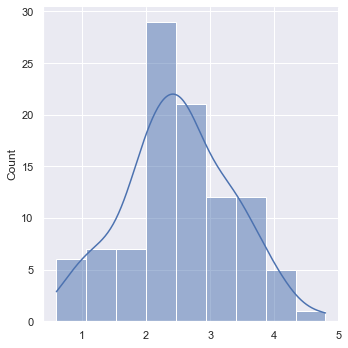

In [17]:
n=5
N=100
means_generation(N,n)

2.5132999999999996

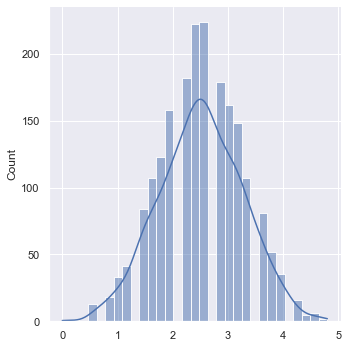

In [18]:
n = 5
N = 2000
#YOUR CODE 
means_generation(N,n)

<details>
    <summary>What is happening when <u><i>n is fixed</i></u> and <u><i>N increases:</i></u>?your answer</summary>



* Now, keep $N$ constant, increase $n$ and observe. What do you conclude?

In [19]:
'''
On voit que plus l'échantillon de moyennes augmente, plus les moyennes obéissent à la loi normale
'''

"\nOn voit que plus l'échantillon de moyennes augmente, plus les moyennes obéissent à la loi normale\n"

1.0

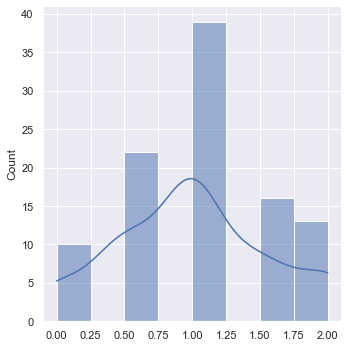

In [20]:
n = 2 
N = 100
#YOUR CODE
means_generation(N,n)

14.892333333333335

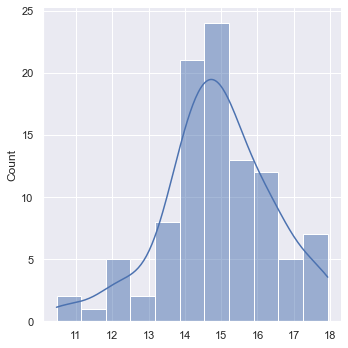

In [21]:
n = 30 
N = 100
#YOUR CODE
means_generation(N,n)

• À mesure que la taille de l'échantillon augmente, la distribution des fréquences se rapproche d'une courbe en forme de cloche (c'est-à-dire une courbe de distribution normale).

• Une taille d'échantillon égale ou supérieure à 30 est nécessaire pour que le théorème central limite soit vrai.

• Un échantillon suffisamment grand peut prédire les paramètres d'une population tels que la moyenne et l'écart type.

<details>
    <summary>What is happening when <u><i>N is fixed</i></u> and <u><i>n increases</i></u>? YOUR ANSWER</summary>


</details>



### 3.2) <u>Numerically</u>

❓ Let's verify the Central Limit Theorem computationally ❓
- Compare `tips_mu` with the mean of means
- Compare `tips_sigma` with the standard deviation of the means, but don't forget the $\sqrt n$ adjustment
- Compute the `skewness` of the distribution of the means using `scipy.stats.skew` (should be close to 0)
- Compute the `kurtosis` of the distribution of the means using `scipy.stats.kurtosis`(should be close to 0)


In [22]:
#YOUR CODE 
print("tips_mu is ",mean_tip)
print("mean of means",general_mean)
output()
print("tips_sigma",std_tip)
print("std of means",general_std/np.sqrt(30))


tips_mu is  2.99827868852459
mean of means 2.9986




tips_sigma 1.3836381890011822
std of means 0.06975250851721712


skewness of means -0.20600049978903137




kurtosis of means -1.173520963077165


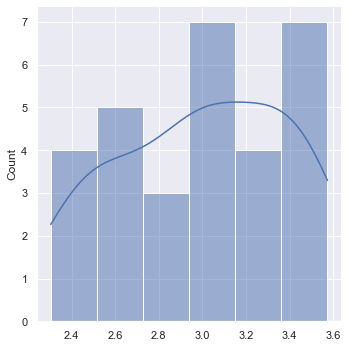

In [23]:
#means_tips
import scipy
print("skewness of means",scipy.stats.skew(means_tips))
output()
print("kurtosis of means",scipy.stats.kurtosis(means_tips))
sns.displot(means_tips,kde=True)

## 💪  4) Use case: Probabilities of accumulating large tips at the end of a work-day

🤔 Let's pick 100 dinners from the dataset (sampling with replacement). What is the probability that the cumulated tips ends up being **greater than 350€**?


1️⃣ Before we answer this question, start by familiarizing yourself with the [**`scipy.stats.norm.pdf`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) tool: 

❓ Can you plot a Normal Distribution pdf with a mean(=10) and standard deviation (=7)?

In [24]:
#YOUR CODE



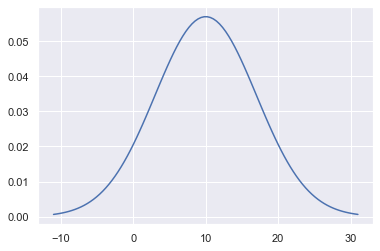

In [25]:
dinners=tips.sample(100)
import math

mu = 10
sigma = 7
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
plt.show()


🤗 `scipy.stats.norm.pdf` is a **convenient way to draw a Gaussian curve**.

The **probability density function** (_a.k.a._ ***pdf***) of a Normal Distribution with parameters $ \mu $ and $ \sigma $ is defined by:

$$ y = \frac{1}{\sigma \sqrt{2 \pi}} exp[-\frac{1}{2} (\frac{x - \mu}{\sigma})^2]$$

😅 Without this function from Scipy, you would have to define a _Gaussian Probability Density Function_ by yourself to plot the Gaussian Curve.

In [26]:
#CODE the function 
def gaussian_probability_density_function(x,mu,sigma):
    firstpart=1/(sigma*np.sqrt(2*3.14))
    secondpart=np.exp(((x-mu/sigma)**2)/-2)
    return firstpart*secondpart

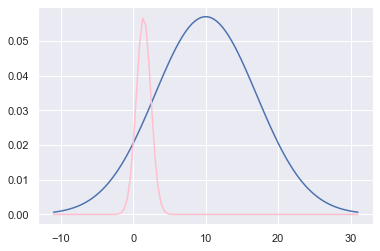

[-1.10000000e+01 -1.05757576e+01 -1.01515152e+01 -9.72727273e+00
 -9.30303030e+00 -8.87878788e+00 -8.45454545e+00 -8.03030303e+00
 -7.60606061e+00 -7.18181818e+00 -6.75757576e+00 -6.33333333e+00
 -5.90909091e+00 -5.48484848e+00 -5.06060606e+00 -4.63636364e+00
 -4.21212121e+00 -3.78787879e+00 -3.36363636e+00 -2.93939394e+00
 -2.51515152e+00 -2.09090909e+00 -1.66666667e+00 -1.24242424e+00
 -8.18181818e-01 -3.93939394e-01  3.03030303e-02  4.54545455e-01
  8.78787879e-01  1.30303030e+00  1.72727273e+00  2.15151515e+00
  2.57575758e+00  3.00000000e+00  3.42424242e+00  3.84848485e+00
  4.27272727e+00  4.69696970e+00  5.12121212e+00  5.54545455e+00
  5.96969697e+00  6.39393939e+00  6.81818182e+00  7.24242424e+00
  7.66666667e+00  8.09090909e+00  8.51515152e+00  8.93939394e+00
  9.36363636e+00  9.78787879e+00  1.02121212e+01  1.06363636e+01
  1.10606061e+01  1.14848485e+01  1.19090909e+01  1.23333333e+01
  1.27575758e+01  1.31818182e+01  1.36060606e+01  1.40303030e+01
  1.44545455e+01  1.48787

In [27]:
mu_example = 10
sigma_example = 7 

# start a figure
#YOUR CODE
x = np.linspace(mu_example - 3*sigma_example, mu_example + 3*sigma_example, 100)
# First subplot :
# Plotting a Gaussian distribution using Scipy Stats with the color blue
#YOUR CODE
plt.plot(x, scipy.stats.norm.pdf(x, mu_example, sigma_example))
# Second subplot : 
# Plotting a Gaussian distribution using our own Python function with the color pink
#YOUR CODE 
plt.plot(x,gaussian_probability_density_function(x,mu_example,sigma_example),color="pink")
plt.show()
print(x)

2️⃣ Back to our exercise:

<u>The real numbers:</u>

From our Exploratory Data Analysis, we have:
- 244 tips (global population)
- $\mu=3€$
- $\sigma=1.38€$

<u>Sampling once</u>

- Imagine that we draw a sample of size 100 out of the global population of dinners
- We observe the sum of these 100 sample tips is 350€, so the average tip $\mu_X$ is 3.5€ for this sample
- **The operation of drawing a sample is random, therefore the average of these sampled data will also be random**

<u>Distribution of samples</u>

❓ Can you guess what would be the **shape** of the **<u>distribution of the means</u>** of these samples **if we were to <u>draw many other samples</u>** of the same size like this one  

❓ In other words, how do you imagine:
- its shape?
- its mean? (store into a variable called **`mu_expected`**)
- its standard deviation? (store it into a variable called **`sigma_expected`**)

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/ctl.png' width=1000>

<details>
    <summary>🧑🏻‍🏫 YOUR Answer:</summary>
</details>

❓ Plot this expected distribution
- On top of it, add the datapoint representing a cumulated tip of 350€ over 100 dinners.

In [28]:
'''
On pense que la distribution de valeur et figure sera presque la meme dans plusieurs cas
'''

'\nOn pense que la distribution de valeur et figure sera presque la meme dans plusieurs cas\n'

In [29]:
tips.tip.describe()


count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

3.09354 0.05943075298193688


(2.0, 4.0)

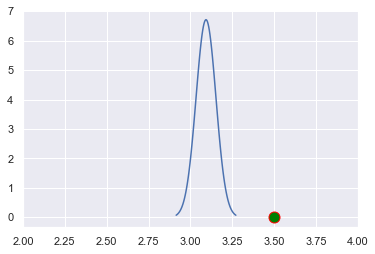

In [30]:
# Expected parameters of the Gaussian variable from the CLT
#YOUR CODE
mus=[]
for i in range(5):
    sample=tips.sample(100)
    tip_100=sample.tip
    mus.append(np.mean(tip_100))

# Instantiating this Gaussian Variable
#YOUR CODE
mu_expected=np.mean(mus)
sigma_expected=np.std(mus)
print(mu_expected,sigma_expected)
x = np.linspace(mu_expected - 3*sigma_expected, mu_expected + 3*sigma_expected, 100)

# Plotting the Gaussian Curve
#YOUR CODE
plt.plot(x, scipy.stats.norm.pdf(x, mu_expected, sigma_expected))
plt.plot(3.5, 0, marker="o", markersize=11, markeredgecolor="red", markerfacecolor="green")
plt.xlim(2, 4)
# Additing the targeted point
#YOUR CODE


👉 For this restaurant, we clearly see that 350 euros of cumulated tips over 100 dinners (average tip of 3.50 euros) seems to be is virtually impossible (this probability of this event would be close to zero).

🍔 It is probably a cheap restaurant serving burgers and fries until 4 AM...

We are almost at the end of the challenge!

🔢 Let's denote $ \bar{X} $ the average tip over 100 dinners 

* ❓ Compute numerically $ \mathbb{P} ( \bar{X} > 3.50 ) $ and store it in `proba_350` variable ❓
* 📚 You will need the **`cumulative distribution function (cdf)`** from [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [31]:
#YOUR CODE 
proba_350=1-scipy.stats.norm.cdf(mu_expected)
proba_350

0.0009889194438378324

In [32]:
print(f"Probability to observe total tips greater than 350€ = {round(proba_350*100,2)} %")

Probability to observe total tips greater than 350€ = 0.1 %


❗️ If we had observed such an amount, we could have deduced with a 99.99% confidence level that the 100 dinners selected were ***not randomly sampled*** from the population of dinners.

## ⭐️  5) The `z-score`

<u>**Alternative computation using z-score**</u>

🤔 Imagine you didn't have access to the `SciPy` library (or even to a computer) to compute the probability density function of a custom-made Gaussian distribution numerically. Which workaround could we use to this end?  

💡 Instead of computing a Gaussian distribution with specific mean and sigma, a much more elegant way is to rephrase our problem to use the **`Standard Normal distribution`** $\mathcal N(0,1)$, from which we could read usual values in a **`Standard Statistical table`** 👇

$$ X \sim \mathcal N(\mu,\sigma) \leftrightarrow Y =  \frac{X - \mu}{\sigma} \sim \mathcal N(0,1) $$

In [33]:
#YOUR CODE 
def sst(X,mu,sigma):
    return (X-mu)/sigma

In [34]:
#https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

❓ Use the standard table above to find the probability we are looking for.

> A `z-score` of $3.62$ corresponds to an area under the curve of the Normal distribution $ \mathcal{N}(0,1)$ with a surface equal to $0.9998$

> Hence, the probability of having the sum of tips greater than 350 euros is equal to  $0.0002$

❓ Double-check this probability with with `scipy.stats.norm` as done previously. Store it into a `proba_z` variable.

In [35]:
from scipy import stats
proba_z = stats.zscore(x)
proba_z

array([-1.71481604, -1.68017329, -1.64553055, -1.6108878 , -1.57624505,
       -1.5416023 , -1.50695955, -1.4723168 , -1.43767406, -1.40303131,
       -1.36838856, -1.33374581, -1.29910306, -1.26446031, -1.22981757,
       -1.19517482, -1.16053207, -1.12588932, -1.09124657, -1.05660382,
       -1.02196108, -0.98731833, -0.95267558, -0.91803283, -0.88339008,
       -0.84874733, -0.81410459, -0.77946184, -0.74481909, -0.71017634,
       -0.67553359, -0.64089084, -0.6062481 , -0.57160535, -0.5369626 ,
       -0.50231985, -0.4676771 , -0.43303435, -0.39839161, -0.36374886,
       -0.32910611, -0.29446336, -0.25982061, -0.22517786, -0.19053512,
       -0.15589237, -0.12124962, -0.08660687, -0.05196412, -0.01732137,
        0.01732137,  0.05196412,  0.08660687,  0.12124962,  0.15589237,
        0.19053512,  0.22517786,  0.25982061,  0.29446336,  0.32910611,
        0.36374886,  0.39839161,  0.43303435,  0.4676771 ,  0.50231985,
        0.5369626 ,  0.57160535,  0.6062481 ,  0.64089084,  0.67

[0.04318948 0.0464618  0.04993022 0.05360209 0.05748467 0.06158513
 0.06591051 0.07046767 0.07526328 0.08030375 0.08559524 0.09114359
 0.09695428 0.10303243 0.10938271 0.11600937 0.12291612 0.13010619
 0.1375822  0.14534622 0.15339966 0.1617433  0.17037724 0.17930084
 0.18851277 0.19801095 0.20779252 0.21785385 0.22819055 0.2387974
 0.24966841 0.2607968  0.27217501 0.28379469 0.29564672 0.30772127
 0.32000776 0.33249491 0.34517077 0.35802278 0.37103774 0.38420193
 0.39750108 0.41092045 0.42444491 0.43805893 0.45174666 0.465492
 0.47927864 0.49309012 0.50690988 0.52072136 0.534508   0.54825334
 0.56194107 0.57555509 0.58907955 0.60249892 0.61579807 0.62896226
 0.64197722 0.65482923 0.66750509 0.67999224 0.69227873 0.70435328
 0.71620531 0.72782499 0.7392032  0.75033159 0.7612026  0.77180945
 0.78214615 0.79220748 0.80198905 0.81148723 0.82069916 0.82962276
 0.8382567  0.84660034 0.85465378 0.8624178  0.86989381 0.87708388
 0.88399063 0.89061729 0.89696757 0.90304572 0.90885641 0.9144047

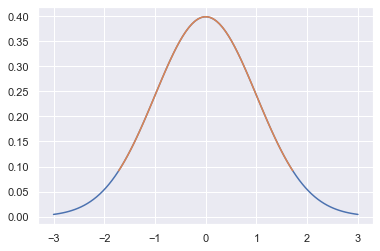

In [36]:
from scipy import stats

# --- Drawing a Standard Gaussian Curve with mean 0 and std 1
#YOUR CODE 
mu = 0
sigma = 1
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))


# --- Adding the z-score of the observations on top of it
#YOUR CODE
plt.plot(proba_z,scipy.stats.norm.pdf(proba_z, mu, sigma))
# --- Computing the cdf of z
#YOUR CODE
cdf=scipy.stats.norm.cdf(proba_z,mu,sigma)
#--- Computing and displau the proba that the standard gaussian is above the z-score
#YOUR CODE
print(cdf)

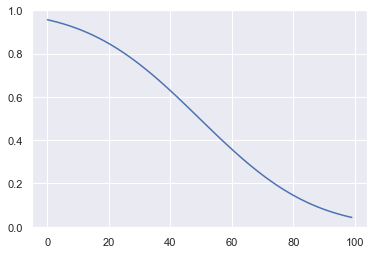

In [37]:
plt.plot(1-cdf)

🎉 Congratulations if you managed to go through this challenge!



🥇 Don't forget to `save`your notebook!